In [32]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [33]:
X = np.array([3.0, 3.5, 4.0, 4.5, 5.0, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0, 10.5, 11.0, 11.5, 12.0])
Y = np.array([32, 36, 38, 42, 46, 49, 55, 59, 62, 68, 70, 73, 75, 81, 88, 92, 94, 98])
x_p = 12.5
alpha = 0.05

In [34]:
n = len(X)
n

18

<function matplotlib.pyplot.show(close=None, block=None)>

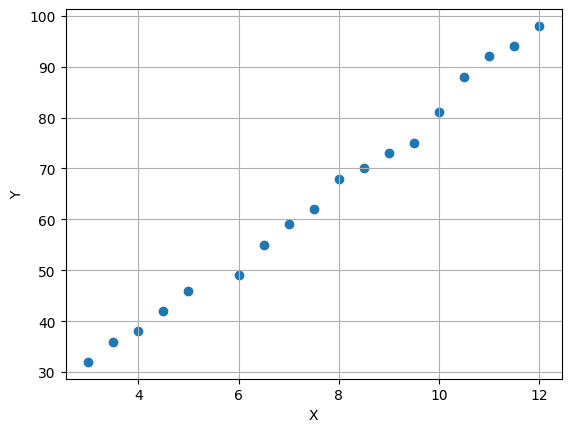

In [35]:
plt.scatter(X, Y, label='Кореляційне поле')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show

In [36]:
xy_b = np.sum(X*Y)/n
x_b = np.sum(X)/n
y_b = np.sum(Y)/n

print(f"x_b = {x_b}")
print(f"y_b = {y_b}")
print(f"xy_b = {xy_b}")

x_b = 7.611111111111111
y_b = 64.33333333333333
xy_b = 546.3333333333334


In [37]:
var_X = np.var(X, ddof=1)
var_Y= np.var(Y, ddof=1)

print(f"S_x^2 = {var_X}")
print(f"S_y = {var_Y}")

S_x^2 = 8.133986928104575
S_y = 446.11764705882354


In [38]:
std_X = np.std(X, ddof=1)
std_Y = np.std(Y, ddof=1)

print(f"S_x = {std_X}")
print(f"S_y = {std_Y}")

S_x = 2.8520145385507023
S_y = 21.121497273129656


In [39]:
r_xy = (xy_b - x_b * y_b) / (std_X * std_Y)
print(r_xy)

0.9410076048454732


In [40]:
b = (xy_b - x_b * y_b) / var_X
print(b)

6.968929958484008


In [41]:
a = y_b - b * x_b
print(a)

11.292033093760608


In [42]:
lin_reg_str = f'y = {a:.4f} + {b:.4f}*x'
print('Рівняння регресії:', lin_reg_str)

Рівняння регресії: y = 11.2920 + 6.9689*x


In [43]:
Y_1 = a + b*X
Y_1

array([32.19882297, 35.68328795, 39.16775293, 42.65221791, 46.13668289,
       53.10561284, 56.59007782, 60.0745428 , 63.55900778, 67.04347276,
       70.52793774, 74.01240272, 77.4968677 , 80.98133268, 84.46579766,
       87.95026264, 91.43472762, 94.9191926 ])

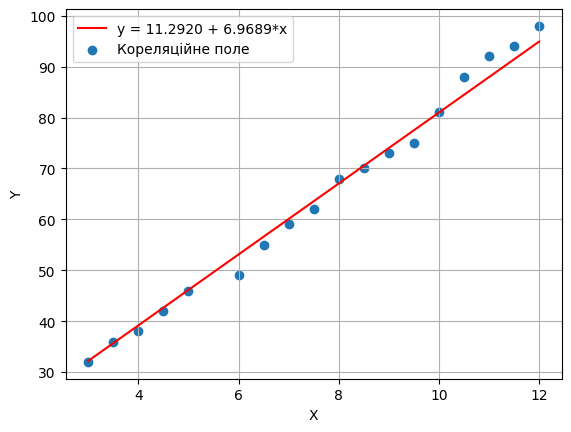

In [44]:
plt.plot(X, Y_1, color='r', label=lin_reg_str)
plt.scatter(X, Y, label='Кореляційне поле')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

In [45]:
R = np.power(r_xy, 2)
print(R)

0.8854953123770142


In [46]:
S_rem_2 = np.sum((Y - Y_1)**2) / (n-2)
S_rem = np.sqrt(S_rem_2)

print(f"S зал ^2 = {S_rem_2}")
print(f"S залиш = {S_rem}")

S зал ^2 = 4.8958362783902745
S залиш = 2.2126536733954265


In [47]:
S_b = np.sqrt(S_rem_2 / np.sum((X - x_b) ** 2))
print(S_b)

0.1881643078645048


In [48]:
S_a = S_b * np.sqrt(np.mean(X**2))
print(S_a)

1.524143799293108


In [49]:
t_a = a / S_a
print(t_a)

7.40877146828128


In [50]:
t_b = b / S_b
print(t_b)

37.03640736957544


In [51]:
t_crit = stats.t.ppf(1-alpha/2, n-2)
print(f"t табл = {t_crit}")

t табл = 2.119905299221011


In [52]:
if abs(t_b) > t_crit:
    print(f'Оскільки t_спост > t_крит, то гіпотеза H0 відхиляється. Параметр b є значущим при a = {alpha}.')
else:
    print(f'Оскільки t_спост < t_крит, то гіпотезу H0 не відхиляємо. Параметр b не є значущим при a = {alpha}.')


Оскільки t_спост > t_крит, то гіпотеза H0 відхиляється. Параметр b є значущим при a = 0.05.


In [53]:

if abs(t_a) > t_crit:
    print(f'Оскільки t_спост > t_крит, то гіпотеза H0 відхиляється. Параметр a є значущим при a = {alpha}.')
else:
    print(f'Оскільки t_спост < t_крит, то гіпотезу H0 не відхиляємо. Параметр a не є значущим при a = {alpha}.')


Оскільки t_спост > t_крит, то гіпотеза H0 відхиляється. Параметр a є значущим при a = 0.05.


In [54]:
delt_a = t_crit * S_a
delt_b = t_crit * S_b
print(f"delt_a = {delt_a}")
print(f"delt_b = {delt_b}")

delt_a = 3.231040516896304
delt_b = 0.39889051336621745


In [55]:
print(f"a є ({a- delt_a} ; {a+ delt_a})")
print(f"b є ({b- delt_b} ; {b+ delt_b})")

a є (8.060992576864304 ; 14.523073610656912)
b є (6.57003944511779 ; 7.367820471850226)


In [56]:
if (a - delt_a) < 0 < (a + delt_a):
    print("Виправлений a")
    print(f"a є (0 ; {a+ delt_a})")
if (b - delt_b) < 0 < (b + delt_b):
    print("Виправлений b")
    print(f"b є (0 ; {b+ delt_b})")

In [57]:
y_p = a + b*x_p
print(y_p)

98.40365757481071


In [58]:
delta_y_p = t_crit * S_rem * np.sqrt(1 + 1 / n + np.pow(x_p - x_b, 2) / np.sum(np.pow(X - x_b, 2)))
print(delta_y_p)

5.1987710051712845


In [59]:
print(f"delta_y_p є ({y_p - delta_y_p}; {y_p + delta_y_p})")

delta_y_p є (93.20488656963943; 103.60242857998199)
